In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from numpy import abs, cos, exp, mean, pi, prod, sin, sqrt, sum
from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
import copy as c

In [2]:
def levy( x ):
    x = np.asarray_chkfinite(x)
    n = len(x)
    z = 1 + (x - 1) / 4
    return (sin( pi * z[0] )**2
        + sum( (z[:-1] - 1)**2 * (1 + 10 * sin( pi * z[:-1] + 1 )**2 ))
        +       (z[-1] - 1)**2 * (1 + sin( 2 * pi * z[-1] )**2 ))
levy([1,1,1,1,1,1,1,1,8])

def ackley(x):
    return -20.0 * exp(-0.2 * sqrt(0.5 * (x[0]**2 + x[1]**2)))-exp(0.5 * (cos(2 *pi * x[0])+cos(2 * pi * x[1]))) + e + 20
def rastrigin(X):
    A = 10
    return A * len(X) + sum([(x**2 - A * np.cos(2 * pi * x)) for x in X])

In [3]:
class Organism:
    def __init__(self,location,direction,health_decay,loss,optimization_dims):
        self.direction=direction
        self.optimization_dims=optimization_dims
        self.location=location
        self.health=1.0
        self.health_decay=health_decay
        self.speed=0.001
        self.average_return=0
        self.gamma=0.10
        self.loss=loss(self.location)
        self.relative_loss=0
        self.absolute_loss=self.loss
    
    def reduceStamina(self):
        self.health*=self.health_decay
        if self.health<0.01:
            return True
        return False
    
    def update_loss(self,similarity,beta):
        self.absolute_loss=((1-beta)* self.relative_loss) + (beta * similarity)
        
    def move(self,loss):
        difference=loss(self.location)-loss(self.location +self.direction)
        self.average_return+= self.gamma * (self.average_return-difference)    
        self.change_direction()
        self.location +=self.direction
#         self.acceleration(difference)
#         self.direction+=self.speed*self.direction

        self.loss=loss(self.location)
        return self.reduceStamina()

    def change_direction(self):
        if self.average_return<=0:
            randomness_scale=np.interp(1-self.health, (0, 1), (0.0005, 0.01))
            direction_change=np.random.laplace(loc=0,scale=randomness_scale,size=self.optimization_dims)
            self.direction+=direction_change
#             self.direction[random.choice(np.arange(self.direction.size))]+=direction_change
#         else:
#             self.health+=(1-health_decay) * self.health
    
    def acceleration(self,difference):
        if difference>0:
            self.speed*=0.9
        else:
            self.speed*=1.1
            
    def clone(self):
        self.health=min(self.health/self.health_decay,1)
        return self.location

    def offspting_cunductor(self,radicalism):
        direction=np.zeros(self.optimization_dims)
        indexes=np.random.randint(0,direction.size,size=(np.random.randint(1,int(self.optimization_dims/10)+1)))
        direction[indexes]=random.uniform(-radicalism, + radicalism,size=indexes.shape)
        return direction

iteration:0 population size:5000 loss:119.85729531010755 abs:0.08245852327529145 beta:0.2475
iteration:1 population size:6275 loss:119.85729531010755 abs:0.1495648535208316 beta:0.245025
iteration:2 population size:7500 loss:119.85729531010755 abs:0.24224932553234724 beta:0.24257474999999998
iteration:3 population size:8676 loss:117.02551859454333 abs:0.2026725800604489 beta:0.2401490025
iteration:4 population size:9804 loss:114.84677768640553 abs:0.19574904100914947 beta:0.23774751247499998
iteration:5 population size:10885 loss:112.63367027107938 abs:0.19337311375770516 beta:0.23537003735024997
iteration:6 population size:11920 loss:111.06384929659623 abs:0.18535550423568672 beta:0.23301633697674748
iteration:7 population size:12910 loss:111.06384929659623 abs:0.22483432063061756 beta:0.23068617360698
iteration:8 population size:13856 loss:108.90962774605569 abs:0.22090550019113184 beta:0.22837931187091018
iteration:9 population size:14759 loss:106.82071880010523 abs:0.22122822994607

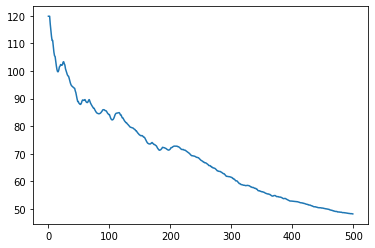

In [4]:
loss_function=levy
optimization_dims=100
initial_population=5000
population=[]
beta=0.25
beta_decay=0.99
health_decay=0.976
initial_locations=[random.uniform(-4, +4,size=optimization_dims) for i in range(initial_population)]
initial_directions=[random.uniform(-beta, +beta,size=optimization_dims) for i in range(initial_population)]
for l,d in zip(initial_locations,initial_directions):
    population.append(Organism(c.deepcopy(l),c.deepcopy(d),health_decay,loss_function,optimization_dims))
rounds=500
elites=[]
offspring_birth_rate=50
for r in range(rounds):
    dead_flag=[]
    offsprings=[]
    beta*=beta_decay
    population.sort(key=lambda organism: organism.loss)
    elites.append(population[0].loss)
    locations=np.array([p.location for p in population])
    losses=np.array([p.loss for p in population])
    similarity=np.inner(locations,locations)
    i=0
    for s in range(similarity.shape[0]):
        similarity[s][i]=0
        i+=1
    similarity=np.sum(similarity,axis=1)
    similarity=(similarity - np.min(similarity)) / (np.max(similarity)- np.min(similarity))
    losses=(losses - np.min(losses)) / (np.max(losses)- np.min(losses))
    for h,s,l in zip(population,similarity,losses):
        h.relative_loss=l
        h.update_loss(s,beta)
    
    print(f"iteration:{r} population size:{len(population)} loss:{loss_function(population[0].location)} abs:{population[0].absolute_loss} beta:{beta}")
    population.sort(key=lambda organism: organism.absolute_loss)

    spring_counts=offspring_birth_rate
    for organism in population:
        if spring_counts>0:
            base_location=organism.clone()
            for i in range(spring_counts):
                offsprings.append(Organism(c.deepcopy(base_location),c.deepcopy(organism.offspting_cunductor(beta)),health_decay,loss_function,optimization_dims))
            spring_counts-=1
            dead_flag.append(False)
        else:
            dead_flag.append(organism.move(loss_function))
    offspring_birth_rate=max(10,offspring_birth_rate-1)
    dead_flag=np.where(np.array(dead_flag, dtype=bool)==True)
    population=[i for j, i in enumerate(population) if j not in dead_flag[0]] + offsprings
plt.plot(elites)

In [5]:
# beta=0.25
# for i in range(500):
#     beta*=0.992
#     print(i,beta)

In [6]:
# import matplotlib.pyplot as plt


# # plt.plot(rand)
# # plt.show()

# # rand=np.random.exponential(scale=0.07,size=(2000000,1))
# rand=np.random.laplace(loc=0,scale=0.07,size=(2000000,1))
# j=0
# for r in rand:
#     if r>0.1:
#         j+=1
# print(j)
# plt.figure()
# number_density, radii = np.histogram(rand, bins=10000,normed=False)
# plt.plot(radii[0:-1], number_density)
# # P.ylim(0, central_surface_density)
# plt.legend()      
# plt.show()

In [7]:

# import seaborn as sns

# sns.distplot(random.exponential(scale=0.00000009,size=2000), hist=False)

# plt.show() 

In [8]:
# A=np.array([[1,2,3],[5,5,5],[-3,2,-7]])
# np.sum(np.inner(A,A),axis=1)